In [1]:
import pandas as pd
import requests
from googletrans import Translator

In [2]:
data = pd.read_csv('/home/anais/code/anaisdangeot/mood_detector/raw_data/dataset.csv')
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
data.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


- popularity : continuous var, 0-100, 50% less than or equal to 35
- Duration is in ms:continuous var, would need to be scaled
- danceability: continuous var, 0- ~1, pretty balanced
- energy: continuous var0-1, pretty balanced
- loudness: continous var, -49 to 4, would need to be scalled. most of them are negative. 
Checked Spotify API doc and found: Values typically range between -60 and 0 db. Will need to check further and decide if getting rid of some obs
- speechiness: continous variable. will try to categorise to see better
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- acousticness : continuous var, A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- instrumentalness: continous varm, Predicts whether a track contains no vocals. 
- liveness: continous var, Detects the presence of an audience in the recording. 
- valence (target): A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track
- tempo: The overall estimated tempo of a track in beats per minute (BPM).0 -243, would need to be scaled
- key, mode, time signature: cat

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         114000 non-null  int64  
 1   track_id           114000 non-null  object 
 2   artists            113999 non-null  object 
 3   album_name         113999 non-null  object 
 4   track_name         113999 non-null  object 
 5   popularity         114000 non-null  int64  
 6   duration_ms        114000 non-null  int64  
 7   explicit           114000 non-null  bool   
 8   danceability       114000 non-null  float64
 9   energy             114000 non-null  float64
 10  key                114000 non-null  int64  
 11  loudness           114000 non-null  float64
 12  mode               114000 non-null  int64  
 13  speechiness        114000 non-null  float64
 14  acousticness       114000 non-null  float64
 15  instrumentalness   114000 non-null  float64
 16  li

# 1. Feature exploratory analysis

## 1.1 Analysis of popularity feature

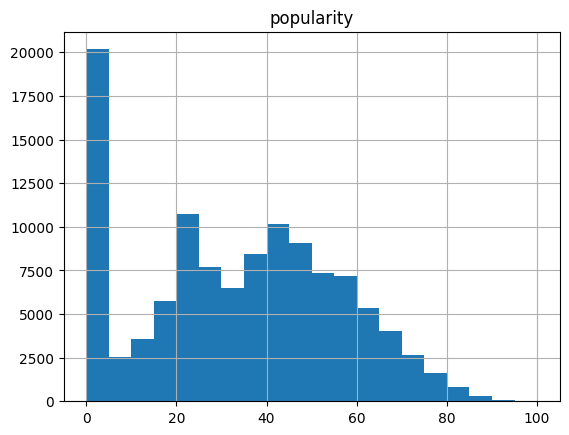

In [6]:
data.hist('popularity', bins=20);

In [20]:
data['popularity'].value_counts()

popularity
0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
96         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

## 1.2 Analysis on loudness feature

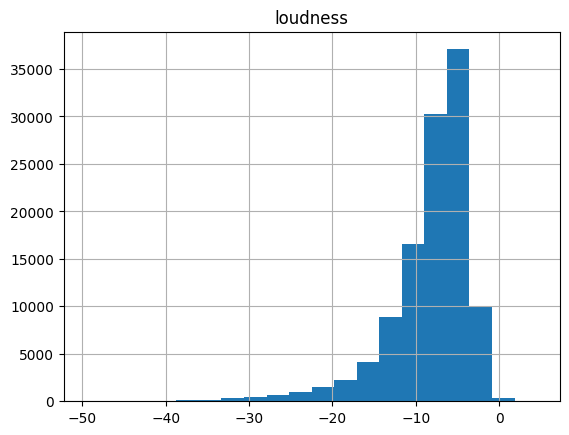

In [21]:
data.hist('loudness', bins=20);

In [24]:
data[data['loudness']>0].shape

(90, 21)

## 1.3 Analysis on speechiness feature

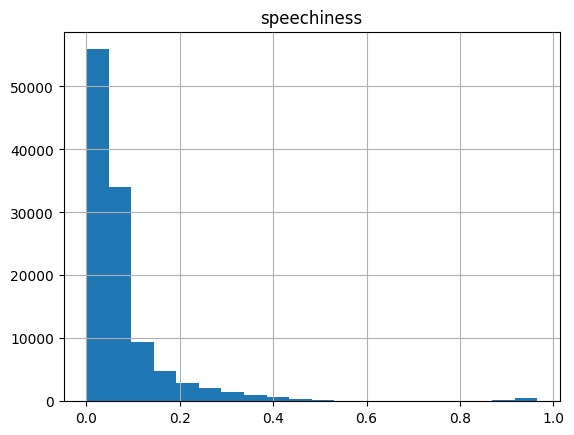

In [25]:
data.hist('speechiness', bins=20);

In [28]:
data[data['speechiness']>0.66].shape

(880, 21)

### Creation of a categorical var around speechiness

Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

In [31]:
def categories(row):
    if row>0.66:
        return 'mostly words'
    elif 0.33 <= row >= 0.66:
        return 'both music and speech'
    elif row <0.33:
        return 'music, non speech'
data['speechiness_3_cat'] = data['speechiness'].apply(lambda x: categories(x))
data['speechiness_3_cat'].value_counts()

speechiness_3_cat
music, non speech        110390
mostly words                880
both music and speech         2
Name: count, dtype: int64

## 1.4 String features

In [36]:
data.select_dtypes(include=['object','bool'] )

,track_id,artists,album_name,track_name,explicit,track_genre,speechiness_3_cat
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,False,acoustic,"music, non speech"
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,False,acoustic,"music, non speech"
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,False,acoustic,"music, non speech"
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,False,acoustic,"music, non speech"
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,False,acoustic,"music, non speech"
...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,False,world-music,"music, non speech"
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,False,world-music,"music, non speech"
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,False,world-music,"music, non speech"
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,False,world-music,"music, non speech"


In [46]:
len(data['track_genre'].unique())

114

In [47]:
data['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow